In [9]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score

data = pd.read_csv('Iris.csv')
data.head()

In [8]:
X = data.drop(['Id','Species'], axis = 1)
Y = data['Species']
print(X.shape)
print(Y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                            test_size=0.2, random_state=0) 

(150, 4)
(150,)


In [35]:
## performing LDA
lda = LDA(n_components = 2)
X_train = lda.fit_transform(X_train,Y_train)
X_test = lda.transform(X_test)
Y_pred = lda.predict(X_test)
print("The accuracy of the model is:")
print("--------------------------------")
print(metrics.accuracy_score(Y_test, Y_pred))

ValueError: X has 2 features per sample; expecting 4

There are 90 samples in the training set and 60 sampels in the test set


Text(0,0.5,'Sepal width')

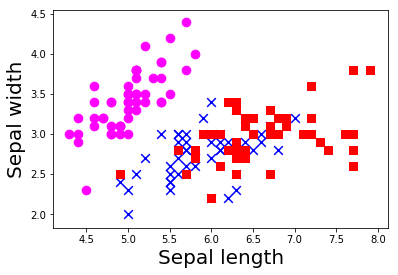

In [54]:
#######################################################
############### sepal length and width ################
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('husl')
import pandas as pd
from sklearn import datasets
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X = iris.data[:,:2]
Y = iris.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, 
                                                    random_state = 5)
print('There are {} samples in the training set and {} sampels in the test set'
      .format(X_train.shape[0], Y_test.shape[0]))


########### plot #############################
from matplotlib.colors import ListedColormap

markers = ('o', 'x','s')
colors = ('magenta', 'blue', 'red')
cmap = ListedColormap(colors[:len(np.unique(Y_test))])
for idx, cl in enumerate(np.unique(Y)): 
    plt.scatter(x=X[Y==cl, 0], y=X[Y==cl, 1], c=cmap(idx), 
                marker = markers[idx], label=cl, s =75 )
plt.xlabel('Sepal length', fontsize = 20)
plt.ylabel('Sepal width', fontsize = 20)

In [59]:
lda = LDA(n_components = 2)
X_r = lda.fit(X,Y).transform(X_test)
Y_pred = lda.predict(X_test)

print("The accuracy of the model is:")
print("--------------------------------")
print(metrics.accuracy_score(Y_test, Y_pred))





The accuracy of the model is:
--------------------------------
0.8333333333333334


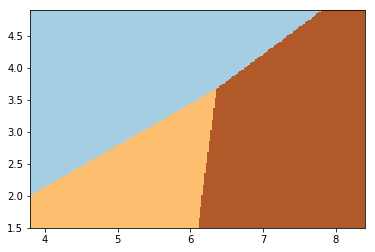

In [62]:
#Plot the decision surface
x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
h = 0.02  #step size in mesh

xx,yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])

#Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap = plt.cm.Paired)

Misclassified samples: 10


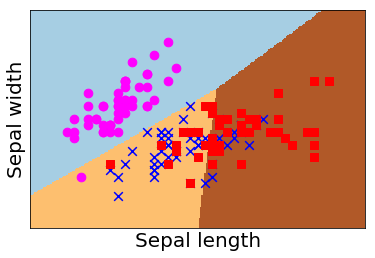

In [64]:
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap = plt.cm.Paired)
#plot the training points 
#plt.scatter(X[:, 0], X[:, 1], c = Y, edgecolors = 'k', cmap = plt.cm.Paired)

markers = ('o', 'x','s')
colors = ('magenta', 'blue', 'red')
cmap = ListedColormap(colors[:len(np.unique(Y_test))])
for idx, cl in enumerate(np.unique(Y)): 
    plt.scatter(x=X[Y==cl, 0], y=X[Y==cl, 1], c=cmap(idx), 
                marker = markers[idx], label=cl, s = 75)
plt.xlabel('Sepal length', fontsize = 20)
plt.ylabel('Sepal width', fontsize = 20)

plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.xticks(())
plt.yticks(())

#plt.show()
plt.savefig('lda_iris_1.eps', format='eps', dpi=1000)
print('Misclassified samples: %d' % (Y_test != Y_pred).sum())

Misclassified samples: 10


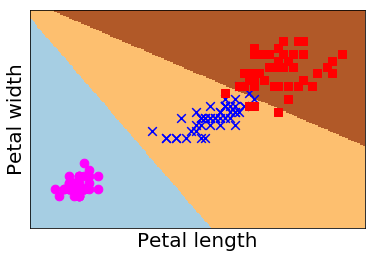

In [67]:
#import iris dataset
iris = datasets.load_iris()
X = iris.data[:,[2,3]]  #taking first two columns: petal length and width
Y = iris.target

#multinomial logistic regression 
lda = LDA(n_components = 2)

#fit the data
X_r = lda.fit(X,Y).transform(X_test)

#Plot the decision boundary 
x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
h = 0.02  #step size in mesh

xx,yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])

#Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap = plt.cm.Paired)

#plot the training points 
markers = ('o', 'x','s')
colors = ('magenta', 'blue', 'red')
cmap = ListedColormap(colors[:len(np.unique(Y_test))])
for idx, cl in enumerate(np.unique(Y)): 
    plt.scatter(x=X[Y==cl, 0], y=X[Y==cl, 1], c=cmap(idx), 
                marker = markers[idx], label=cl, s=75)
plt.xlabel('Petal length', fontsize = 20)
plt.ylabel('Petal width', fontsize = 20)

plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.xticks(())
plt.yticks(())

#plt.show()
plt.savefig('lda_iris_2.eps', format='eps', dpi=1000)
print('Misclassified samples: %d' % (Y_test != Y_pred).sum())